# FDA Hw3 predict stock

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# import svm package
from sklearn import datasets 
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

# for logistic regression
from sklearn import linear_model, model_selection, metrics
from sklearn.linear_model import LogisticRegression

# nerual network
from keras import models, layers, optimizers

stock_data = pd.read_csv('stock_data.csv')
stock_data.head()


Using TensorFlow backend.


,Date,Open Price,Close Price,High Price,Low Price,Volume
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952


In [2]:
stock_data['move open'] = None
stock_data['move close'] = None
stock_data['move high'] = None
stock_data['move low'] = None
stock_data['move volume'] = None

# 預測明天股價
如果明天的股價比今天的高則move1值為，相反為0

舉例來說:
    明天的Open Price大於今天的Open Price則，今天的move open為1，反之為0

In [3]:
for i in range(1, stock_data.shape[0]):
    # open price
    if (stock_data.iloc[i, 1] > stock_data.iloc[i - 1, 1]):
        stock_data.iloc[i - 1, 6] = 1
    else:
        stock_data.iloc[i - 1, 6] = 0
        
    # close price
    if (stock_data.iloc[i, 2] > stock_data.iloc[i - 1, 2]):
        stock_data.iloc[i - 1, 7] = 1
    else:
        stock_data.iloc[i - 1, 7] = 0
    
    # high price
    if (stock_data.iloc[i, 3] > stock_data.iloc[i - 1, 3]):
        stock_data.iloc[i - 1, 8] = 1
    else:
        stock_data.iloc[i - 1, 8] = 0
    
    # low price
    if (stock_data.iloc[i, 4] > stock_data.iloc[i - 1, 4]):
        stock_data.iloc[i - 1, 9] = 1
    else:
        stock_data.iloc[i - 1, 9] = 0
    
    # volume
    if (stock_data.iloc[i, 5] > stock_data.iloc[i - 1, 5]):
        stock_data.iloc[i - 1, 10] = 1
    else:
        stock_data.iloc[i - 1, 10] = 0

stock_data.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume,move open,move close,move high,move low,move volume
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080,1,0,1,1,1
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016,1,1,1,1,0
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032,0,0,0,0,0
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032,0,1,0,0,1
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952,1,0,1,0,0


# Normalize all attribute
為了方便比較，將所有資料的數值正規劃

In [4]:
st_op = stock_data['Open Price']
st_cp = stock_data['Close Price']
st_hp = stock_data['High Price']
st_lp = stock_data['Low Price']
st_vl = stock_data['Volume']

# normalized open price
def op_nor (num):
    return (num - st_op.min()) / (st_op.max() - st_op.min())


# normalized close price
def cp_nor (num):
    return (num - st_cp.min()) / (st_cp.max() - st_cp.min())

# normalized high price
def hp_nor (num):
    return (num - st_hp.min()) / (st_hp.max() - st_hp.min())

# normalized low price
def lp_nor (num):
    return (num - st_lp.min()) / (st_lp.max() - st_lp.min())

# normalized volume
def vl_nor (num):
    return (num - st_vl.min()) / (st_vl.max() - st_vl.min())

stock_data['nor op'] = stock_data['Open Price'].apply(op_nor)
stock_data['nor cp'] = stock_data['Close Price'].apply(cp_nor)
stock_data['nor hp'] = stock_data['High Price'].apply(hp_nor)
stock_data['nor lp'] = stock_data['Low Price'].apply(lp_nor)
stock_data['nor vl'] = stock_data['Volume'].apply(vl_nor)

stock_data.describe()

,Open Price,Close Price,High Price,Low Price,Volume,nor op,nor cp,nor hp,nor lp,nor vl
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000,2516.000000,2516.000000
mean,1765.493029,1765.867067,1774.433740,1755.869141,2.869158e+09,0.481162,0.483243,0.480560,0.481825,0.273310
std,566.003293,565.538751,566.671163,564.789277,1.312045e+09,0.250724,0.250880,0.252343,0.249871,0.152529
min,679.280000,676.530000,695.270000,666.790000,5.181584e+08,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1278.175000,1278.315000,1286.160000,1268.235000,2.016047e+09,0.265294,0.266959,0.263128,0.266088,0.174134
50%,1806.270000,1805.450000,1810.450000,1800.675000,2.425113e+09,0.499225,0.500803,0.496598,0.501648,0.221689
75%,2122.492500,2124.222500,2129.150000,2113.325000,3.248909e+09,0.639302,0.642214,0.638517,0.639969,0.317457
max,2936.760000,2930.750000,2940.910000,2927.110000,9.120100e+09,1.000000,1.000000,1.000000,1.000000,1.000000


# 正規劃後資料隨時間的變化
從下圖可以明顯觀察到volume與其他數據關係不大，open price、close price、high price和low price具有高度正相關。

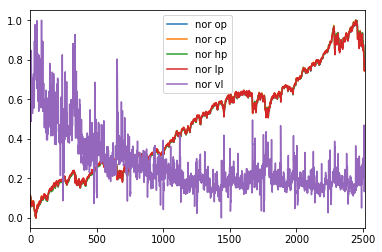

In [5]:
stock_data[['nor op', 'nor cp', 'nor hp', 'nor lp', 'nor vl']].plot()

# 將資料分成訓練資料與測試資料


In [6]:
train_data = stock_data.iloc[0:2264]
test_data = stock_data.iloc[2264:2515] # don't use the last one
# train data
x_train = train_data[['Open Price', 'Close Price', 'High Price', 'Low Price', 'Volume']]
y_train = train_data[['move open', 'move close', 'move high', 'move low', 'move volume']]

# test data
x_test = test_data[['Open Price', 'Close Price', 'High Price', 'Low Price', 'Volume']]
y_test = test_data[['move open', 'move close', 'move high', 'move low', 'move volume']]

# standard data
x_train_std = train_data[['nor op', 'nor cp', 'nor hp', 'nor lp', 'nor vl']]
x_test_std = test_data[['nor op', 'nor cp', 'nor hp', 'nor lp', 'nor vl']]

# 產生比較的依據
看全部猜對的機率，得出來結果為54.4%左右，希望目標能差越這個數字

In [7]:
y_ans = pd.Series(stock_data['move close'])
y_ans = y_ans[:2514]
y_ans = y_ans.astype('int')
fake_guess = list(1 for i in range(0, 2514))
fake_guess = pd.Series(fake_guess)
basic_acc = accuracy_score(fake_guess, y_ans)
print('basic accuracy: %s' % basic_acc)

basic accuracy: 0.5437549721559268


# SVM
第一次得出來的結果不是很理想，train的準確率只比全部猜長的準確率高了0.5%，測試資料更慘連一半的機率都不到，可以算是完全失敗。

In [8]:
penalty = 0.05
svm = SVC(C=penalty, kernel='linear', probability=True)

y_train = y_train.astype('int')   # 將資料轉型
svm.fit(x_train[['Open Price', 'Close Price', 'High Price', 'Low Price']], y_train['move close'])

SVC(C=0.05, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [9]:
y_test = y_test.astype('int')
y_train = y_train.astype('int')
acc_rate_test = accuracy_score(y_test['move close'], svm.predict(x_test[['Open Price', 'Close Price', 'High Price', 'Low Price']]))
acc_rate_train = accuracy_score(y_train['move close'], svm.predict(x_train[['Open Price', 'Close Price', 'High Price', 'Low Price']]))
print('test accuracy: %s' % acc_rate_test)
print('train accuracy: %s' % acc_rate_train)

test accuracy: 0.4820717131474104
train accuracy: 0.5468197879858657


# 試著減少餵給svm的參數
只餵svm 'open price'和'close price'，神奇的是發生了，svm的準確率上升了，可以說明上個步驟為太多參數可能導致overfitting

In [10]:
penalty = 0.05
svm = SVC(C=penalty, kernel='linear', probability=True)

y_train = y_train.astype('int')   # 將資料轉型
svm.fit(x_train[['Open Price', 'Close Price']], y_train['move close'])
y_test = y_test.astype('int')
y_train = y_train.astype('int')
acc_rate_test = accuracy_score(y_test['move close'], svm.predict(x_test[['Open Price', 'Close Price']]))
acc_rate_train = accuracy_score(y_train['move close'], svm.predict(x_train[['Open Price', 'Close Price']]))
print('test accuracy: %s' % acc_rate_test)
print('train accuracy: %s' % acc_rate_train)

test accuracy: 0.5179282868525896
train accuracy: 0.5463780918727915


In [14]:
def svn_try(penalty, kernel):
    global x_train, x_test, y_test, y_train
    svm = SVC(C=penalty, kernel=kernel, probability=True)

    y_train = y_train.astype('int')   # 將資料轉型
    svm.fit(x_train[['Open Price', 'Close Price']], y_train['move close'])
    y_test = y_test.astype('int')
    y_train = y_train.astype('int')
    acc_rate_test = accuracy_score(y_test['move close'], svm.predict(x_test[['Open Price', 'Close Price']]))
    acc_rate_train = accuracy_score(y_train['move close'], svm.predict(x_train[['Open Price', 'Close Price']]))
    print('test accuracy: %s' % acc_rate_test)
    print('train accuracy: %s' % acc_rate_train)

In [15]:
svn_try(0.1, 'linear')

test accuracy: 0.5258964143426295
train accuracy: 0.5459363957597173


In [16]:
svn_try(1, 'linear')

test accuracy: 0.5258964143426295
train accuracy: 0.5463780918727915


In [ ]:

svn_try(0.01, 'poly')

/home/jack/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# logistic regression 


In [ ]:
def logistic(x_train, y_train, x_test, y_test):
    lrm = LogisticRegression().fit(x_train, y_train['move close'])
    acc_train = accuracy_score(y_train['move close'], lrm.predict(x_train))
    acc_test = accuracy_score(y_test['move close'], lrm.predict(x_test))
    print('    train accuracy: %s' % acc_train)
    print('    test accuracy: %s' % acc_test)

In [ ]:
print("沒有正規劃準確率")
logistic(x_train, y_train, x_test, y_test)

In [ ]:
print("正規劃準確率")
logistic(x_train_std, y_train, x_test_std, y_test)

# Gradient Descent Model
***Reference***
- [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)

In [ ]:
# def logistic_regression (x_data, y_data, )
re_model = linear_model.SGDClassifier(loss='hinge', max_iter=100000, tol=-np.infty)
re_model.fit(x_train, y_train['move close'])
acc_rate_train = accuracy_score(y_train['move close'], re_model.predict(x_train))
acc_rate_test = accuracy_score(y_test['move close'], re_model.predict(x_test))


# normalizse
print('traning data準確率: %s' % acc_rate_train)
print('testing data準確率: %s' % acc_rate_test)

# Neural Network

In [ ]:
hidden_units = 20
activation = 'sigmoid'
penalize = 0.01
learning_rate = 0.001
epochs = 50
batch_size = 500 

model = models.Sequential()


# hidden layer
model.add(layers.Dense(input_dim = 5,
                       units = hidden_units,
                       activation=activation))

# output layer
model.add(layers.Dense(input_dim = hidden_units,
                       units = 1,
                       activation=activation))

# loss function and optimizer
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

history = model.fit(x_train, y_train['move close'], epochs=epochs, batch_size=batch_size) 

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [ ]:
# class weight

In [ ]:
stock_data.describe()

# 用今天的股票預測明天的股票